In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

/Users/serene/miniconda3/envs/gneiss_v2/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## prepare data (interested genus with 5 vitD measures)

In [2]:
mf = pd.read_csv('../data/mapping_cleaned_MrOS.txt', sep='\t', dtype=str, index_col='#SampleID', na_values='Missing:Not collected') 

In [3]:
genus = pd.read_csv('../data/table_mc5876_sorted_L6.txt', skiprows=1, sep='\t', dtype=str, index_col = '#OTU ID')

In [4]:
genus.head()

,BI0023,BI0056,BI0131,BI0153,BI0215,BI0353,BI0371,BI0372,BI0380,BI0389,...,SD8964,SD8966,SD8972,SD8973,SD8985,SD8996,SD8999,SD9001,SD9003,SD9009
#OTU ID,,,,,,,,,,,,,,,,,,,,,
Unassigned;Other;Other;Other;Other;Other,0.00299015548809,0.0,9.61261174661e-05,0.0,0.0,0.0,0.000276518084283,0.00083811488621,0.0,0.0,...,0.0,0.0,0.000346040717458,0.00404538727183,0.0,0.0,0.00166008357662,0.0,0.0,0.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0.000276014352746,0.00010055304173,9.61261174661e-05,0.0,0.0,0.0,0.000331821701139,0.0,0.000159650896706,0.0,...,0.0,0.0,0.000230693811639,0.000493339911199,0.0,0.0,0.0,0.0,0.00012025012025,0.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000394671928959,0.0,0.0,0.0,0.0,0.0,0.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__Methanomassiliicoccus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# select interested genus (no E.coli found)
genus = genus[genus.index.str.contains(
    'Bifidobacterium|Faecalibacterium|Eubacterium|Roseburia \
    |Anaerostipes|Bacteroides|Ruminococcus|Lactobacillus|Escherichia \
    |Blautia|Ruminococcus|Lachnospira|Collinsella \
    |Coprococcus|Phascolarctobacterium|Prevotella',
     na=False)]

In [6]:
genus.index

Index(['k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae];g__[Prevotella]',
       'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Eubacteriaceae;g__Pseudoramibacter_Eubacterium',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;Other',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostri

In [7]:
genus = genus.transpose()

In [8]:
genus.head()

#OTU ID,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae];g__[Prevotella],k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Eubacteriaceae;g__Pseudoramibacter_Eubacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;Other,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnobacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospira,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Moryella,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Oribacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus],k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Phascolarctobacterium,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Eubacterium]
BI0023,0.0,0.273254209219,0.000138007176373,0.0,0.0,0.0,0.000552028705493,0.031419633821,0.00506026313368,0.00519827031006,...,0.0,0.0349618180145,0.0,0.0,0.0,0.00630232772104,0.0246572821787,0.0320636673107,0.00795841383752,9.20047842488e-05
BI0056,0.0,0.750930115636,0.0189039718451,0.0,0.0,0.0,0.0,0.0316239316239,0.0,0.0061337355455,...,0.0,0.00165912518854,0.0,0.0,0.00140774258421,0.0112116641528,0.00603318250377,0.0201106083459,0.00231271995978,0.0
BI0131,0.0,0.249062770355,9.61261174661e-05,0.0,0.0,0.0,0.00129770258579,0.0264346823032,0.000384504469864,0.00163414399692,...,0.0,0.0215803133711,0.0,0.0,0.0,0.00264346823032,0.0448908968567,0.00759396327982,0.00932423339421,0.0
BI0153,0.00191659506972,0.485493358007,0.000132178970326,0.0,0.0,0.0,0.00508889035754,0.0310620580266,0.000925252792281,0.00330447425815,...,0.0,0.0617275791422,0.0,0.0,0.00898816998216,0.0023131319807,0.155112021677,0.00713766439759,0.00489062190206,0.000132178970326
BI0215,0.000113205411219,0.383766344031,0.0,0.0,0.0,0.0,0.00367917586461,0.0786211580914,0.0,0.00899983019188,...,0.0,0.00933944642554,0.0,0.0,0.0164147846267,0.00158487575706,0.0604516895908,0.053319748684,0.00696213278995,0.0


In [9]:
table = pd.merge(mf, genus, left_index=True, right_index=True)

In [10]:
print(genus.shape)
print(mf.shape)
print(table.shape)

(599, 24)
(599, 66)
(599, 90)


In [11]:
table.head()

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnobacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospira,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Moryella,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Oribacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus],k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Phascolarctobacterium,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Eubacterium]
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,0.0349618180145,0.0,0.0,0.0,0.00630232772104,0.0246572821787,0.0320636673107,0.00795841383752,9.20047842488e-05
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,0.00165912518854,0.0,0.0,0.00140774258421,0.0112116641528,0.00603318250377,0.0201106083459,0.00231271995978,0.0
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,0.0215803133711,0.0,0.0,0.0,0.00264346823032,0.0448908968567,0.00759396327982,0.00932423339421,0.0
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,0.0617275791422,0.0,0.0,0.00898816998216,0.0023131319807,0.155112021677,0.00713766439759,0.00489062190206,0.000132178970326
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,0.00933944642554,0.0,0.0,0.0164147846267,0.00158487575706,0.0604516895908,0.053319748684,0.00696213278995,0.0


In [12]:
vars_vd = np.array(['OHVD3', 'OHV1D3', 'OHV24D3', 
                    'ratio_activation', 'ratio_catabolism'])
table = table[np.append(list(genus.columns), vars_vd)]
print(table.shape)

(599, 29)


In [13]:
table.head()

,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae];g__[Prevotella],k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Eubacteriaceae;g__Pseudoramibacter_Eubacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;Other,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia,...,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus],k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Phascolarctobacterium,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Eubacterium],OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
BI0023,0.0,0.273254209219,0.000138007176373,0.0,0.0,0.0,0.000552028705493,0.031419633821,0.00506026313368,0.00519827031006,...,0.00630232772104,0.0246572821787,0.0320636673107,0.00795841383752,9.20047842488e-05,25.8,0.039299999999999995,1.77,0.0015232558139534882,0.0686046511627907
BI0056,0.0,0.750930115636,0.0189039718451,0.0,0.0,0.0,0.0,0.0316239316239,0.0,0.0061337355455,...,0.0112116641528,0.00603318250377,0.0201106083459,0.00231271995978,0.0,39.2,0.0619,3.91,0.001579081632653061,0.09974489795918368
BI0131,0.0,0.249062770355,9.61261174661e-05,0.0,0.0,0.0,0.00129770258579,0.0264346823032,0.000384504469864,0.00163414399692,...,0.00264346823032,0.0448908968567,0.00759396327982,0.00932423339421,0.0,23.1,0.0521,1.49,0.002255411255411255,0.06450216450216449
BI0153,0.00191659506972,0.485493358007,0.000132178970326,0.0,0.0,0.0,0.00508889035754,0.0310620580266,0.000925252792281,0.00330447425815,...,0.0023131319807,0.155112021677,0.00713766439759,0.00489062190206,0.000132178970326,27.3,0.0431,2.14,0.0015787545787545787,0.07838827838827839
BI0215,0.000113205411219,0.383766344031,0.0,0.0,0.0,0.0,0.00367917586461,0.0786211580914,0.0,0.00899983019188,...,0.00158487575706,0.0604516895908,0.053319748684,0.00696213278995,0.0,33.0,0.0502,3.62,0.0015212121212121212,0.1096969696969697


In [14]:
table = table.apply(pd.to_numeric, errors='coerce') 

In [15]:
table.drop(['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;Other',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__',
               'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Butyrivibrio',
                'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Dorea',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Epulopiscium',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnobacterium',
                'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Moryella',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Oribacterium'],
          axis=1, inplace=True)

In [16]:
table = table.rename(columns = {
    'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium': 'Bifidobacterium',
    'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides': 'Bacteroides',
    'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella': 'Prevotellaceae_Prevotella',
    'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae];g__[Prevotella]': 'Paraprevotellaceae_Prevotella',
    'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus': 'Lactobacillus',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Eubacteriaceae;g__Pseudoramibacter_Eubacterium': 'Pseudoramibacter_Eubacterium',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes': 'Anaerostipes',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus': 'Coprococcus',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospira': 'Lachnospira',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia': 'Roseburia',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus]': 'Lachnospiraceae_Ruminococcus',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium': 'Faecalibacterium',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus': 'Ruminococcaceae_Ruminococcus',
    'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Phascolarctobacterium': 'Phascolarctobacterium',
    'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Eubacterium]': 'Eubacterium'})

In [17]:
table.head()

,Bifidobacterium,Bacteroides,Prevotellaceae_Prevotella,Paraprevotellaceae_Prevotella,Lactobacillus,Pseudoramibacter_Eubacterium,Anaerostipes,Coprococcus,Lachnospira,Roseburia,Lachnospiraceae_Ruminococcus,Faecalibacterium,Ruminococcaceae_Ruminococcus,Phascolarctobacterium,Eubacterium,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
BI0023,0.000000,0.273254,0.000138,0.0,0.0,0.0,0.005060,0.015733,0.034962,0.000000,0.006302,0.024657,0.032064,0.007958,0.000092,25.8,0.0393,1.77,0.001523,0.068605
BI0056,0.000000,0.750930,0.018904,0.0,0.0,0.0,0.000000,0.001609,0.001659,0.001408,0.011212,0.006033,0.020111,0.002313,0.000000,39.2,0.0619,3.91,0.001579,0.099745
BI0131,0.000000,0.249063,0.000096,0.0,0.0,0.0,0.000385,0.002932,0.021580,0.000000,0.002643,0.044891,0.007594,0.009324,0.000000,23.1,0.0521,1.49,0.002255,0.064502
BI0153,0.001917,0.485493,0.000132,0.0,0.0,0.0,0.000925,0.001124,0.061728,0.008988,0.002313,0.155112,0.007138,0.004891,0.000132,27.3,0.0431,2.14,0.001579,0.078388
BI0215,0.000113,0.383766,0.000000,0.0,0.0,0.0,0.000000,0.002547,0.009339,0.016415,0.001585,0.060452,0.053320,0.006962,0.000000,33.0,0.0502,3.62,0.001521,0.109697


In [18]:
table.columns

Index(['Bifidobacterium', 'Bacteroides', 'Prevotellaceae_Prevotella',
       'Paraprevotellaceae_Prevotella', 'Lactobacillus',
       'Pseudoramibacter_Eubacterium', 'Anaerostipes', 'Coprococcus',
       'Lachnospira', 'Roseburia', 'Lachnospiraceae_Ruminococcus',
       'Faecalibacterium', 'Ruminococcaceae_Ruminococcus',
       'Phascolarctobacterium', 'Eubacterium', 'OHVD3', 'OHV1D3', 'OHV24D3',
       'ratio_activation', 'ratio_catabolism'],
      dtype='object')

In [19]:
#table.to_csv('../data/genus.txt', sep='\t')

## Linear Regression

In [21]:
var = table.columns[0:15]
print(var)

Index(['Bifidobacterium', 'Bacteroides', 'Prevotellaceae_Prevotella',
       'Paraprevotellaceae_Prevotella', 'Lactobacillus',
       'Pseudoramibacter_Eubacterium', 'Anaerostipes', 'Coprococcus',
       'Lachnospira', 'Roseburia', 'Lachnospiraceae_Ruminococcus',
       'Faecalibacterium', 'Ruminococcaceae_Ruminococcus',
       'Phascolarctobacterium', 'Eubacterium'],
      dtype='object')


In [22]:
vars_vd

array(['OHVD3', 'OHV1D3', 'OHV24D3', 'ratio_activation', 'ratio_catabolism'],
      dtype='<U16')

#### OHVD3

In [23]:
df = table.copy()
out = []
k = 0
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHVD3 = out.loc[out.pvalue <= 0.05]
out_OHVD3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
2,OHVD3,Prevotellaceae_Prevotella,-10.98298,0.007156,0.011202,8.189063e-28,7.764368,0.362017


In [27]:
table.head()

,Bifidobacterium,Bacteroides,Prevotellaceae_Prevotella,Paraprevotellaceae_Prevotella,Lactobacillus,Pseudoramibacter_Eubacterium,Anaerostipes,Coprococcus,Lachnospira,Roseburia,Lachnospiraceae_Ruminococcus,Faecalibacterium,Ruminococcaceae_Ruminococcus,Phascolarctobacterium,Eubacterium,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
BI0023,0.000000,0.273254,0.000138,0.0,0.0,0.0,0.005060,0.015733,0.034962,0.000000,0.006302,0.024657,0.032064,0.007958,0.000092,25.8,0.0393,1.77,0.001523,0.068605
BI0056,0.000000,0.750930,0.018904,0.0,0.0,0.0,0.000000,0.001609,0.001659,0.001408,0.011212,0.006033,0.020111,0.002313,0.000000,39.2,0.0619,3.91,0.001579,0.099745
BI0131,0.000000,0.249063,0.000096,0.0,0.0,0.0,0.000385,0.002932,0.021580,0.000000,0.002643,0.044891,0.007594,0.009324,0.000000,23.1,0.0521,1.49,0.002255,0.064502
BI0153,0.001917,0.485493,0.000132,0.0,0.0,0.0,0.000925,0.001124,0.061728,0.008988,0.002313,0.155112,0.007138,0.004891,0.000132,27.3,0.0431,2.14,0.001579,0.078388
BI0215,0.000113,0.383766,0.000000,0.0,0.0,0.0,0.000000,0.002547,0.009339,0.016415,0.001585,0.060452,0.053320,0.006962,0.000000,33.0,0.0502,3.62,0.001521,0.109697


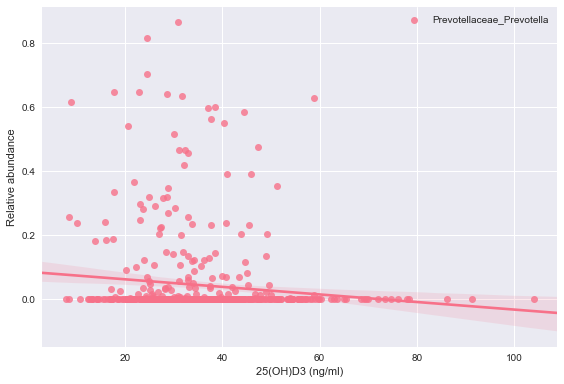

In [23]:
k = 0
bact = out_OHVD3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel='25(OH)D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/genus_reg_VD3.pdf')
ax.savefig('../figures/genus_reg_VD3.png')

#### OHV1D3

In [24]:
out = []
k = 1
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHV1D3 = out.loc[out.pvalue <= 0.05]
out_OHV1D3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
1,OHV1D3,Bacteroides,-0.011518,0.011666,0.009455,1.816891e-28,6.102997,0.953016
12,OHV1D3,Ruminococcaceae_Ruminococcus,0.084555,0.001211,0.016646,2.502311e-28,31.603776,0.507392
13,OHV1D3,Phascolarctobacterium,-0.152032,0.034137,0.006163,9.054788e-28,86.486522,0.641577


In [25]:
out

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
0,OHV1D3,Bifidobacterium,0.018077,0.868669,-0.001721,1.229341e-27,131.484898,0.665745
1,OHV1D3,Bacteroides,-0.011518,0.011666,0.009455,1.816891e-28,6.102997,0.953016
2,OHV1D3,Prevotellaceae_Prevotella,0.002484,0.702342,-0.001511,7.802799e-28,7.831930,0.149407
3,OHV1D3,Paraprevotellaceae_Prevotella,0.003065,0.959776,-0.001765,1.299471e-27,73.096008,0.817623
4,OHV1D3,Lactobacillus,-0.195468,0.392207,-0.000472,1.593746e-27,274.842171,0.537365
5,OHV1D3,Pseudoramibacter_Eubacterium,-5.461079,0.188975,0.001288,1.295306e-27,5003.683510,0.633321
6,OHV1D3,Anaerostipes,0.035615,0.789175,-0.001643,1.403874e-27,160.201445,0.601175
7,OHV1D3,Coprococcus,0.034671,0.674550,-0.001457,1.225937e-27,99.315507,0.889846
8,OHV1D3,Lachnospira,0.061143,0.370823,-0.000350,1.163529e-27,82.207821,0.950994
9,OHV1D3,Roseburia,-0.076511,0.352369,-0.000236,1.804796e-27,98.985275,0.616736


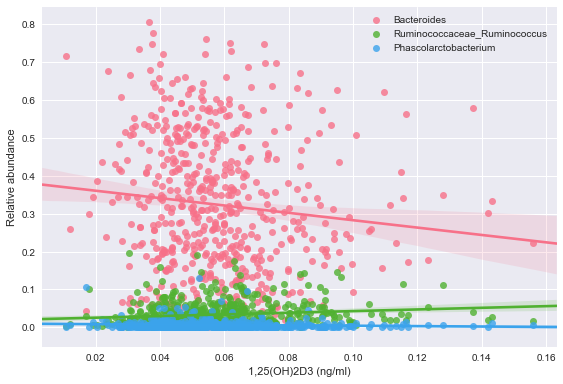

In [26]:
k = 1
bact = out_OHV1D3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel='1,25(OH)2D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/genus_reg_V1D3.pdf')
ax.savefig('../figures/genus_reg_V1D3.png')

#### OHV24D3

In [27]:
out = []
k = 2
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHV24D3 = out.loc[out.pvalue <= 0.05]
out_OHV24D3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
2,OHV24D3,Prevotellaceae_Prevotella,-1.288448,0.032291,0.006330,2.907806e-42,7.831930,0.208097
12,OHV24D3,Ruminococcaceae_Ruminococcus,7.396641,0.002293,0.014596,2.948031e-41,31.603776,0.031124


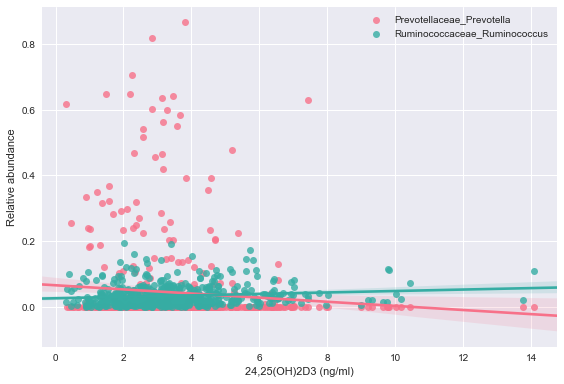

In [28]:
k = 2
bact = out_OHV24D3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel='24,25(OH)2D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/genus_reg_24D3.pdf')
ax.savefig('../figures/genus_reg_24D3.png')

#### ratio_activation

In [29]:
out = []
k = 3
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_activation = out.loc[out.pvalue <= 0.05]
out_activation

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
1,ratio_activation,Bacteroides,-0.000626,0.000236,0.022373,8.681013e-58,6.083666,0.167541
2,ratio_activation,Prevotellaceae_Prevotella,0.000957,0.000067,0.026545,1.470153e-52,7.764368,0.000423
3,ratio_activation,Paraprevotellaceae_Prevotella,0.007077,0.001657,0.015945,1.266952e-53,72.395932,0.000074
13,ratio_activation,Phascolarctobacterium,-0.005487,0.042689,0.005602,2.294433e-58,86.888392,0.630899
14,ratio_activation,Eubacterium,0.013105,0.043091,0.005574,1.200683e-58,207.931031,0.740843


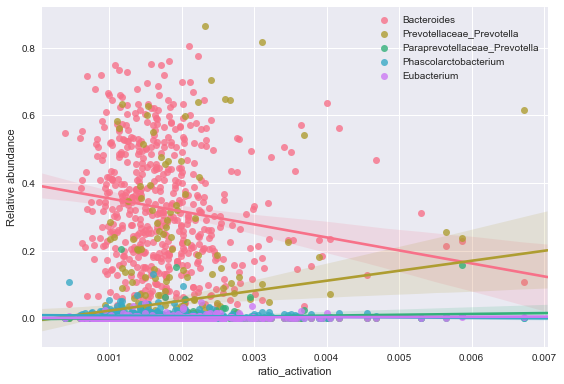

In [30]:
k = 3
bact = out_activation.X.values
sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel=vars_vd[k], ylabel='Relative abundance')
ax.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/genus_reg_act.pdf')
ax.savefig('../figures/genus_reg_act.png')

#### ratio_catabolism

In [31]:
out = []
k = 4
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_cabolism = out.loc[out.pvalue <= 0.05]
out_cabolism

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
4,ratio_catabolism,Lactobacillus,-0.723035,0.035272,0.006185,0.000867,272.206142,0.726473
12,ratio_catabolism,Ruminococcaceae_Ruminococcus,0.096066,0.015568,0.008729,0.001121,31.532797,0.662494
13,ratio_catabolism,Phascolarctobacterium,0.235143,0.031940,0.006489,0.005923,86.888392,0.042249


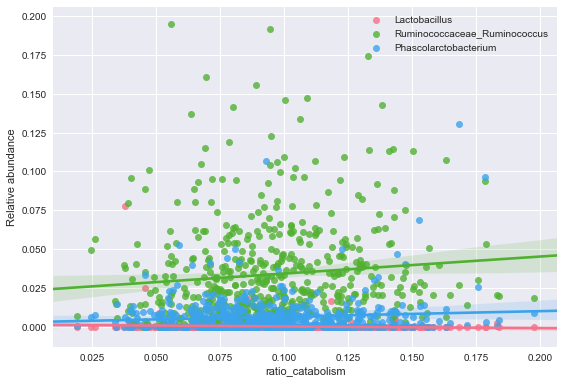

In [32]:
k = 4
bact = out_cabolism.X.values
sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel=vars_vd[k], ylabel='Relative abundance')
ax.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/genus_reg_cat.pdf')
ax.savefig('../figures/genus_reg_cat.png')

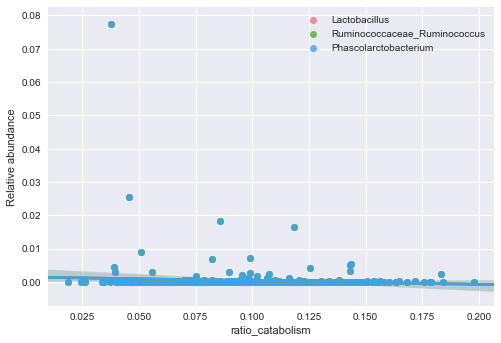

In [33]:
k = 4
bact = out_cabolism.X.values
sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y='Lactobacillus', 
                     label=bact[i], data=table)
    ax.set(xlabel=vars_vd[k], ylabel='Relative abundance')
ax.legend()

In [34]:
table.describe()

,Bifidobacterium,Bacteroides,Prevotellaceae_Prevotella,Paraprevotellaceae_Prevotella,Lactobacillus,Pseudoramibacter_Eubacterium,Anaerostipes,Coprococcus,Lachnospira,Roseburia,Lachnospiraceae_Ruminococcus,Faecalibacterium,Ruminococcaceae_Ruminococcus,Phascolarctobacterium,Eubacterium,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,556.000000,567.000000,567.000000,556.000000,556.000000
mean,0.002526,0.326546,0.045751,0.002041,0.000379,0.000030,0.001137,0.006784,0.011246,0.006150,0.006297,0.057823,0.033415,0.006360,0.001479,35.229137,0.057775,3.430864,0.001772,0.094776
std,0.008122,0.183466,0.129269,0.014157,0.003544,0.000196,0.006093,0.009974,0.012060,0.009927,0.008714,0.054154,0.031446,0.011356,0.004870,12.450758,0.019773,1.834771,0.000735,0.029770
min,0.000000,0.000296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.800000,0.010700,0.300000,0.000398,0.018788
25%,0.000000,0.186624,0.000000,0.000000,0.000000,0.000000,0.000102,0.001408,0.002825,0.000202,0.001708,0.016072,0.010723,0.000000,0.000000,27.400000,0.044100,2.175000,0.001316,0.074216
50%,0.000252,0.310399,0.000161,0.000000,0.000000,0.000000,0.000356,0.003373,0.007855,0.002453,0.003469,0.046507,0.024056,0.003037,0.000000,33.650000,0.055500,3.180000,0.001660,0.092821
75%,0.001509,0.467449,0.001551,0.000000,0.000000,0.000000,0.000879,0.007776,0.015373,0.008197,0.007032,0.086202,0.044282,0.008278,0.000575,41.825000,0.066300,4.235000,0.002081,0.112849
max,0.079564,0.977380,0.865785,0.205010,0.077477,0.003185,0.122872,0.110648,0.092635,0.090509,0.067184,0.447118,0.194942,0.130668,0.048825,104.000000,0.156000,14.070000,0.006727,0.197786


In [35]:
# clustermap: http://seaborn.pydata.org/generated/seaborn.clustermap.html